In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [35]:
folders = ['/bradesco', '/itau', '/nubank', '/inter', '/bancodobrasil', '/next']
filenames = ['/bradesco-', '/itau-','/nubank-', '/inter-', '/bb-', '/next-']
months = [('oct', 2019), ('nov', 2019), ('dec', 2019), ('jan', 2020), ('feb', 2020), ('mar', 2020), ('apr', 2020), ('may', 2020)]

In [36]:
df = pd.DataFrame()
for fol, fn in zip(folders, filenames):
    for m in months:
        df_aux = pd.read_csv('data' + fol + fn + str(m[0]) + str(m[1]) + '.csv', index_col =0)
        df_aux['bank'] = fol.replace('/','')
        df = df.append(df_aux)

df.reset_index(drop = True, inplace = True)

2019-10-01 2020-01-30 2020-05-31


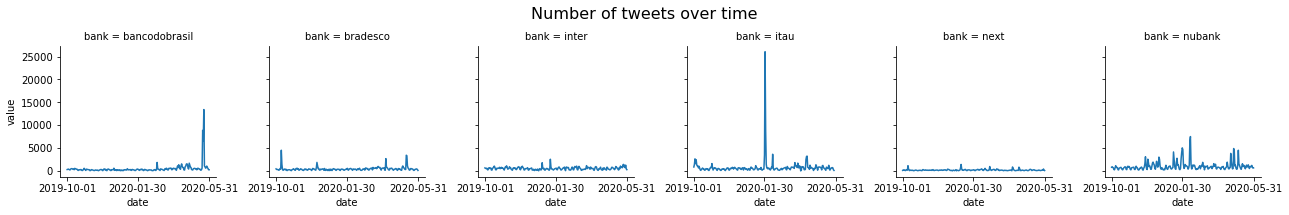

In [37]:
df_gby = df.groupby(['date', 'bank']).size()
df_gby = pd.DataFrame(df_gby).reset_index()
df_gby.columns = ['date', 'bank', 'value']
print(min(df_gby.date), df_gby.loc[len(df_gby)//2].date ,max(df_gby.date))
g = sns.FacetGrid(df_gby, col="bank")
g.map(sns.lineplot, "date", "value")
g.set(xticks = [min(df_gby.date), df_gby.loc[len(df_gby)//2].date ,max(df_gby.date)])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Number of tweets over time', fontsize=16)
plt.show()

In [38]:
# plotly setup
fig = go.Figure()
fig = px.line(df_gby, x='date', y='value', color='bank', title="Number of tweets over time")

fig.show()